<a href="https://colab.research.google.com/github/sachinacharyaa/Horse-or-Human/blob/main/Horse_or_Human_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow_datasets

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import os

# download dataset

In [ ]:
dataset, info = tfds.load('horses_or_humans', with_info=True, as_supervised=True)


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/1027 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/horses_or_humans/incomplete.WY3MFC_3.0.0/horses_or_humans-train.tfrecord*.…

Generating test examples...:   0%|          | 0/256 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/horses_or_humans/incomplete.WY3MFC_3.0.0/horses_or_humans-test.tfrecord*..…

Dataset horses_or_humans downloaded and prepared to /root/tensorflow_datasets/horses_or_humans/3.0.0. Subsequent calls will reuse this data.


In [ ]:
info
dataset

{Split('train'): <_PrefetchDataset element_spec=(TensorSpec(shape=(300, 300, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>,
 Split('test'): <_PrefetchDataset element_spec=(TensorSpec(shape=(300, 300, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>}

In [ ]:
class_names = info.features['label'].names
class_names

['horses', 'humans']

In [ ]:
dataset

{Split('train'): <_PrefetchDataset element_spec=(TensorSpec(shape=(300, 300, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>,
 Split('test'): <_PrefetchDataset element_spec=(TensorSpec(shape=(300, 300, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>}

In [ ]:
for i, example in enumerate(dataset['train']):
  image,label = example[0], example[1]
  save_dir = './horse-or-human/train/{}'.format(class_names[label])
  os.makedirs(save_dir, exist_ok=True)

  filename = '{}_{}.jpg'.format(class_names[label], i)
  filepath = save_dir + "/" + filename

  tf.keras.preprocessing.image.save_img(filepath, image)
  # break

In [ ]:
for i, example in enumerate(dataset['test']):
  image,label = example[0], example[1]
  save_dir = './horse-or-human/test/{}'.format(class_names[label])
  os.makedirs(save_dir, exist_ok=True)

  filename = '{}_{}.jpg'.format(class_names[label], i)
  filepath = save_dir + "/" + filename

  tf.keras.preprocessing.image.save_img(filepath, image)
  # break

Image Data Generator

The ImageDataGenerator class in Keras can be used to create a data generator object that can be used to load images from a directory and automatically preprocess them.
The data generator can also perform data augmentation, which is a technique for artificially increasing the size of a training dataset by creating modified versions of images in the dataset.
Data augmentation is a useful technique for improving the performance of CNNs on small image datasets.
The data generator can also be used to normalize the pixel values of the images, which is a common preprocessing step for image classification tasks.
https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_dir = '/content/horse-or-human/train'
image_size = (300, 300)
batch_size = 32

train_datagen = ImageDataGenerator(rescale=1/255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = image_size,
    batch_size = batch_size,
    class_mode = 'binary'
)

test_dir = '/content/horse-or-human/test'
test_datagen = ImageDataGenerator(rescale=1/255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = image_size,
    batch_size = batch_size,
    class_mode = 'binary'
)

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [ ]:
train_generator.class_indices

{'horses': 0, 'humans': 1}

In [ ]:
train_generator.filenames[:5], train_generator.filenames[-5:]

(['horses/horses_0.jpg',
  'horses/horses_1.jpg',
  'horses/horses_1000.jpg',
  'horses/horses_1004.jpg',
  'horses/horses_1005.jpg'],
 ['humans/humans_993.jpg',
  'humans/humans_996.jpg',
  'humans/humans_997.jpg',
  'humans/humans_998.jpg',
  'humans/humans_999.jpg'])

In [ ]:
train_generator.samples

1027

In [ ]:
# data visualization
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

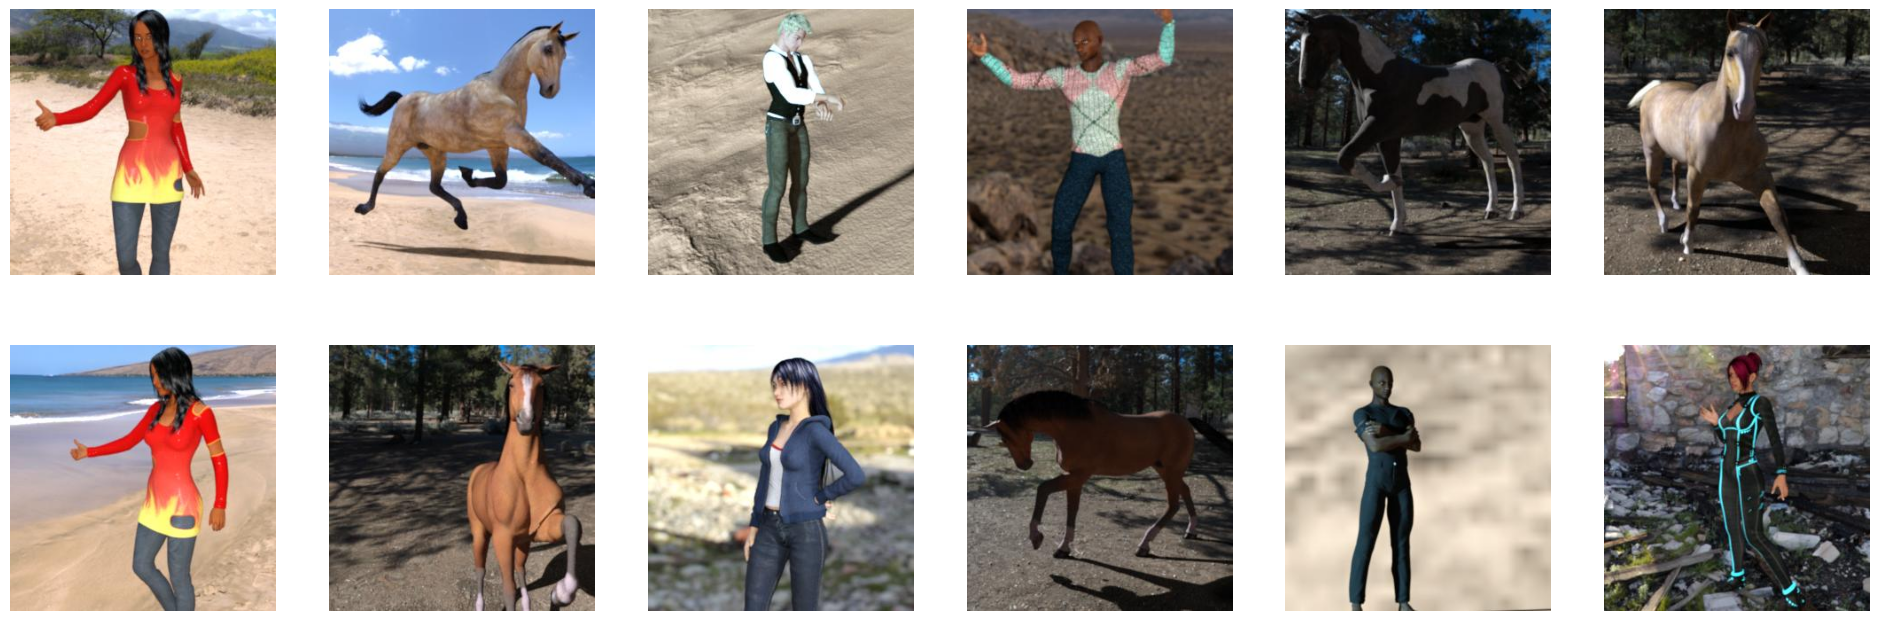

In [ ]:
nrows = 2
ncols = 6
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4) # 16x8

next_batch = train_generator.next()
for i in range(0, nrows*ncols):
  ax = plt.subplot(nrows, ncols, i+1)
  ax.axis('Off')
  plt.imshow(next_batch[0][i])

plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

In [ ]:
def get_model():
  model = Sequential()
  # 1st layer CNN
  model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', input_shape=(300,300,3)))
  model.add(MaxPool2D(pool_size=2))

  # 2nd layer CNN
  model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
  model.add(MaxPool2D(pool_size=2))

  # 3rd layer CNN
  model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
  model.add(MaxPool2D(pool_size=2))

  # flatten layers and FCN
  model.add(Flatten())
  model.add(Dense(512, activation='relu'))

  model.add(Dense(1, activation='sigmoid'))

  return model

In [ ]:
model = get_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 300, 300, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 150, 150, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 75, 75, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 37, 37, 128)       0

In [ ]:
model.layers

In [ ]:
model.layers[0].name

'conv2d'

In [ ]:
weights, biases = model.layers[0].get_weights()


In [ ]:

model.layers[1].get_weights()

[]

In [ ]:
model = get_model()

adam = tf.keras.optimizers.Adam(learning_rate=0.001)
rmsprop = tf.keras.optimizers.RMSprop(learning_rate=0.0001)
adamax = tf.keras.optimizers.Adamax(learning_rate=0.0001)

model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(train_generator, epochs=5, validation_data=test_generator)

Epoch 1/5
33/33 [==============================] - 16s 203ms/step - loss: 0.7732 - accuracy: 0.6173 - val_loss: 0.6908 - val_accuracy: 0.5000
Epoch 2/5
33/33 [==============================] - 5s 159ms/step - loss: 0.4899 - accuracy: 0.7887 - val_loss: 0.5403 - val_accuracy: 0.7188
Epoch 3/5
33/33 [==============================] - 5s 147ms/step - loss: 0.3154 - accuracy: 0.8880 - val_loss: 0.6686 - val_accuracy: 0.7148
Epoch 4/5
33/33 [==============================] - 6s 175ms/step - loss: 0.2022 - accuracy: 0.9435 - val_loss: 0.6035 - val_accuracy: 0.7891
Epoch 5/5
33/33 [==============================] - 5s 164ms/step - loss: 0.1269 - accuracy: 0.9688 - val_loss: 0.8838 - val_accuracy: 0.7539


In [ ]:
history.history

{'loss': [0.7732366323471069,
  0.4899238646030426,
  0.3153679668903351,
  0.20219068229198456,
  0.1269214153289795],
 'accuracy': [0.6173320412635803,
  0.7887049913406372,
  0.8880233764648438,
  0.9435248374938965,
  0.9688413143157959],
 'val_loss': [0.690834105014801,
  0.5403270721435547,
  0.6685630679130554,
  0.6035069823265076,
  0.8838350772857666],
 'val_accuracy': [0.5, 0.71875, 0.71484375, 0.7890625, 0.75390625]}

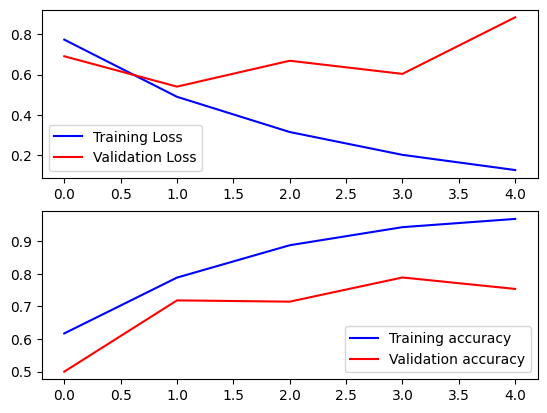

In [ ]:
# plot loss and accuracy curve
fix, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label='Training Loss')
ax[0].plot(history.history['val_loss'], color='r', label='Validation Loss')
ax[0].legend(loc='best')

ax[1].plot(history.history['accuracy'], color='b', label='Training accuracy')
ax[1].plot(history.history['val_accuracy'], color='r', label='Validation accuracy')
ax[1].legend(loc='best')

In [ ]:
# save model
model.save('horse-or-human.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# load model
from tensorflow.keras.models import load_model
model_load = load_model('horse-or-human.h5')

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

img = image.load_img('/content/horse-or-human/test/horses/horses_109.jpg', target_size=image_size)
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img/255

# predict
prediction = model_load.predict(img)
print(prediction)

TH = 0.5
predicted_class = int(prediction[0][0]>TH)

class_indices = train_generator.class_indices
labels={v:k for k,v in class_indices.items()}
labels[predicted_class]

1/1 [==============================] - 0s 20ms/step
[[0.0055156]]


'horses'